# Electricity Bill Management System

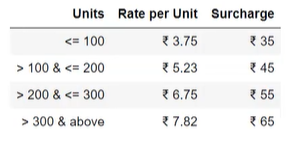

Import Section

In [4]:
from datetime import date, timedelta
from prettytable import PrettyTable
from PIL import Image, ImageDraw, ImageFont
import xlsxwriter
import pandas as pd
from openpyxl import load_workbook

Function Section

In [5]:
def bill_amt(Units_Consumed):
    if Units_Consumed <= 100:
        Bill_Amount = Units_Consumed * 3.75 + 35 
    elif Units_Consumed <= 200:
        Bill_Amount = Units_Consumed * 5.23 + 45 
    elif Units_Consumed <= 300:
        Bill_Amount = Units_Consumed * 6.75 + 55
    else:
        Bill_Amount = Units_Consumed * 7.82 + 65
    return Bill_Amount

In [6]:
def bill_print(Date, Customer_Number, Account_Holder_Name, Current_Meter_Reading, Previous_Meter_Reading, Units_Consumed, Bill_Amount, due_Date):
    bill = PrettyTable()
    bill.field_names = ["Sr no.", "Particulars", "Data"]
    bill.add_rows([
        [1,"Date",Date],
        [2,"Customer Number",Customer_Number],
        [3,"Account Holder Name",Account_Holder_Name],
        [4,"Current Meter Reading",Current_Meter_Reading],
        [5,"Previous Meter Reading",Previous_Meter_Reading],
        [6,"Units Consumed",Units_Consumed],
        [7,"Net Bill Amount (Inclusive of all taxes) ₹",Bill_Amount],
        [8,"Due Date",due_Date]
    ])
    bill.align = 'l'
    
    img = Image.new('RGB',(500,250),color = 'white')
    fnt = ImageFont.truetype('arial.ttf', 15)
    draw = ImageDraw.Draw(img)
    draw.text((10,10), str(bill), font = fnt, fill = 'black')
    img.save(str(Customer_Number) + '.png')
    
    return bill
    

In [7]:
def exl_create():
    content = {'A':'Date','B':'Customer Number', 'C':'Account Holder Name', 'D':'Current Meter Reading', 'E':'Previous Meter Reading', 'F':'Units Consumed', 'G':'Net Bill Amount (Inclusive of all taxes) ₹', 'H':'Due Date'}
    workbook = xlsxwriter.Workbook('Bill data.xlsx')
    worksheet = workbook.add_worksheet()
    bold = workbook.add_format({'bold':True})
    
    for key,value in content.items():
        worksheet.write(key+'1', value, bold)
    workbook.close()
    
    return "Excel Sheet is Created!"

In [11]:
def bill_data(Date, Customer_Number, Account_Holder_Name, Current_Meter_Reading, Previous_Meter_Reading, Units_Consumed, Bill_Amount, due_Date):
    data = [[  
        Date, 
        Customer_Number, 
        Account_Holder_Name,
        Current_Meter_Reading, 
        Previous_Meter_Reading, 
        Units_Consumed, 
        Bill_Amount, 
        due_Date
        ]]
    df = pd.DataFrame(data, columns = [
        'Date', 
        'Customer Number', 
        'Account Holder Name',
        'Current Meter Reading', 
        'Previous Meter Reading', 
        'Units Consumed', 
        'Bill Amount', 
        'Due Date'
        ])
    
    book = load_workbook('Bill data.xlsx')
    writer = pd.ExcelWriter('Bill data.xlsx', engine = 'openpyxl')
    writer.book = book
    writer.sheets = {ws.title: ws for ws in book.worksheets}

    for sheetname in writer.sheets:
        df.to_excel(writer, sheet_name="Sheet1", startrow = writer.sheets[sheetname].max_row, index = False, header = False)
    writer.save()
    
    return "Database Updated!"
        

Main code Section

In [13]:
print(" Welcome to Electricity Bill Management System\n",exl_create(),"\n")

while True:
    Date = date.today().isoformat()
    due_Date = (date.today() + timedelta(days=30)).isoformat()
    Customer_Number = int(input("Customer Number :"))
    Account_Holder_Name = input("Account Holder Name :")
    Current_Meter_Reading = float(input("Current Meter Reading :"))
    Previous_Meter_Reading = float(input("Previous Meter Reading :"))
    Units_Consumed = Current_Meter_Reading - Previous_Meter_Reading
    print("Units Consumed :",Units_Consumed)
    print("Date :",Date)
    print("Due Date :",due_Date)
    Bill_Amount = bill_amt(Units_Consumed)
    
    print(bill_print(Date, Customer_Number, Account_Holder_Name, Current_Meter_Reading, Previous_Meter_Reading, Units_Consumed, Bill_Amount, due_Date))
    print("Bill printed Successfully!!")
    
    print(bill_data(Date, Customer_Number, Account_Holder_Name, Current_Meter_Reading, Previous_Meter_Reading, Units_Consumed, Bill_Amount, due_Date))
    
    dec = input("Do you want to feed next Bill data (Y/N) :")
    if dec.upper() == 'N':
        print("Thank You!")
        break

 Welcome to Electricity Bill Management System
 Excel Sheet is Created! 

Customer Number :20156
Account Holder Name :Rutuja Paradkar
Current Meter Reading :245
Previous Meter Reading :192
Units Consumed : 53.0
Date : 2021-08-06
Due Date : 2021-09-05
+--------+--------------------------------------------+-----------------+
| Sr no. | Particulars                                | Data            |
+--------+--------------------------------------------+-----------------+
| 1      | Date                                       | 2021-08-06      |
| 2      | Customer Number                            | 20156           |
| 3      | Account Holder Name                        | Rutuja Paradkar |
| 4      | Current Meter Reading                      | 245.0           |
| 5      | Previous Meter Reading                     | 192.0           |
| 6      | Units Consumed                             | 53.0            |
| 7      | Net Bill Amount (Inclusive of all taxes) ₹ | 233.75          |
| 8      